First 5 rows of the dataset:


,Product,Region,Sales,Profit,Discount,Category,Date
0,Laptop,East,1200.0,200.0,0.10,Electronics,15-01-2024
1,Tablet,West,800.0,150.0,0.05,Electronics,16-01-2024
2,Chair,North,150.0,50.0,NaN,Furniture,17-01-2024
3,Laptop,East,NaN,200.0,0.10,Electronics,15-01-2024
4,Desk,South,300.0,NaN,0.15,Furniture,18-01-2024



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   11 non-null     object 
 1   Region    10 non-null     object 
 2   Sales     8 non-null      float64
 3   Profit    9 non-null      float64
 4   Discount  9 non-null      float64
 5   Category  11 non-null     object 
 6   Date      10 non-null     object 
dtypes: float64(3), object(4)
memory usage: 748.0+ bytes

Statistical Summary:


,Sales,Profit,Discount
count,8.000000,9.000000,9.000000
mean,575.000000,122.222222,0.116667
std,368.394199,56.960025,0.070711
min,150.000000,50.000000,0.050000
25%,262.500000,70.000000,0.050000
50%,600.000000,120.000000,0.100000
75%,800.000000,150.000000,0.150000
max,1200.000000,200.000000,0.250000


Number of duplicate rows: 1
Missing values before cleaning:
Product     0
Region      1
Sales       3
Profit      2
Discount    2
Category    0
Date        1
dtype: int64
Missing values after cleaning:
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64

Data after cleaning:


,Product,Region,Sales,Profit,Discount,Category,Date
0,Laptop,East,1200.000000,200.00,0.100,Electronics,2024-01-15
1,Tablet,West,800.000000,150.00,0.050,Electronics,2024-01-16
2,Chair,North,150.000000,50.00,0.125,Furniture,2024-01-17
3,Laptop,East,542.857143,200.00,0.100,Electronics,2024-01-15
4,Desk,South,300.000000,118.75,0.150,Furniture,2024-01-18


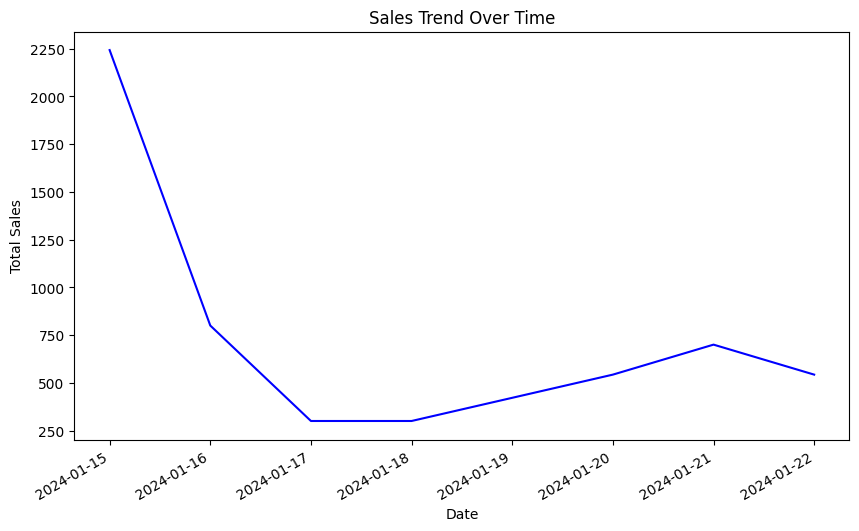

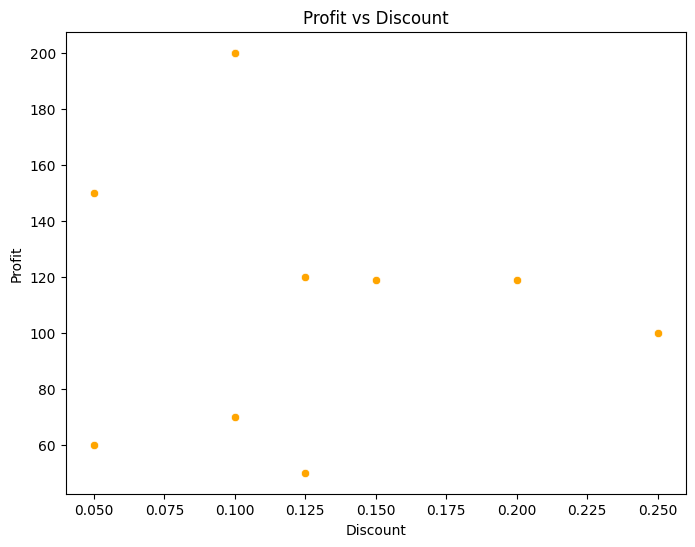

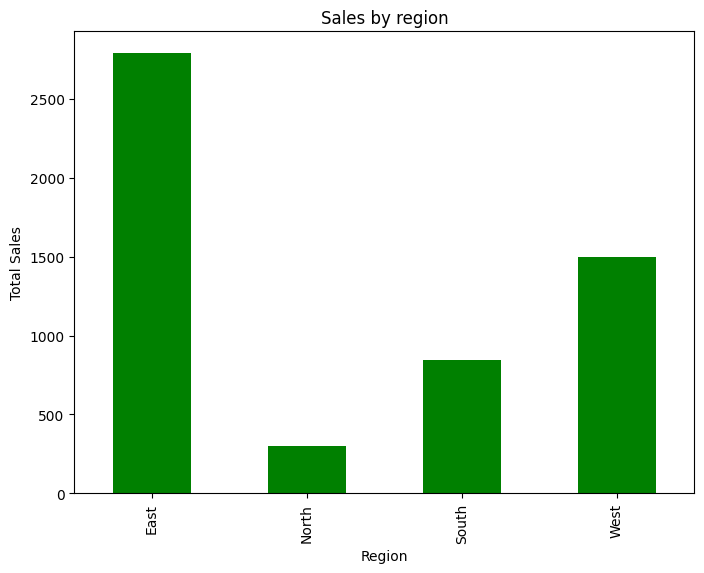

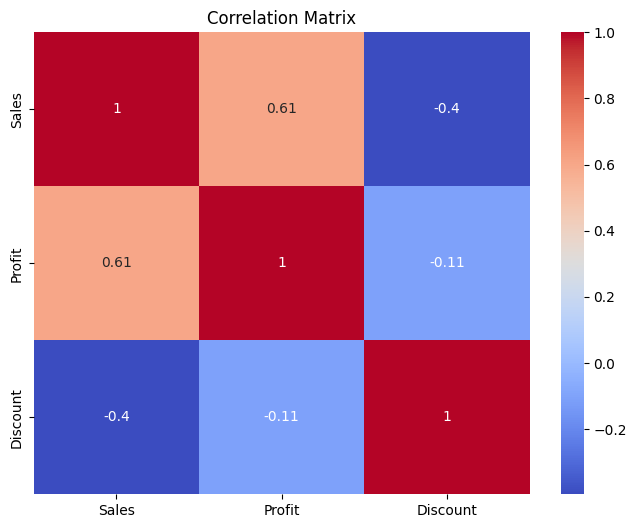

Mean Squared Error: 68080.60
R-squared Score: 0.36


In [17]:
#import librabies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
df = pd.read_csv('sales_data.csv')

#display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

#basic information about the dataset
print("\nDataset Information:")
df.info()
      
#statistical summary of numerical columns
print("\nStatistical Summary:")
display(df.describe()) 

#check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

#remove duplicates
df = df.drop_duplicates()

#handle missing values
print(f"Missing values before cleaning:\n{df.isnull().sum()}")

#fill missing numerical values with column mean
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

# Fix for Region (categorical)
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])

# Fix for Date (datetime)
df['Date'] = df['Date'].fillna(df['Date'].mode()[0])


print(f"Missing values after cleaning:\n{df.isnull().sum()}")

#convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


#verify the changes
print("\nData after cleaning:")
display(df.head())

#plot sales trends over time
plt.figure(figsize=(10,6))
df.groupby('Date')['Sales'].sum().plot(kind='line',color='blue')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')  
plt.ylabel('Total Sales')
plt.show()
      
#scatter plot: profit vs discount
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount', y='Profit', data=df,color='orange')
plt.title('Profit vs Discount')
plt.xlabel('Discount')  
plt.ylabel('Profit')
plt.show() 

#sales distribution by region
plt.figure(figsize=(8,6))
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', color='green')
plt.title('Sales by region')
plt.ylabel('Total Sales')
plt.show()

#heatmap for correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#select features and target
X = df[['Profit', 'Discount']]
Y = df['Sales']

#split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

#train the linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

#make predictions
Y_pred = model.predict(X_test)

#evaluate the model
print(f"Mean Squared Error: {mean_squared_error(Y_test, Y_pred):.2f}")
print(f"R-squared Score: {r2_score(Y_test, Y_pred):.2f}")
